In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline 

In [18]:
import numpy as np
import pandas as pd

In [19]:
redwine = pd.read_csv('winequality-red.csv',delimiter=';')

In [20]:
sum(redwine.duplicated())

240

In [21]:
redwine =redwine.drop_duplicates()
redwine.shape

(1359, 12)

In [22]:
# reindexing the dataframe
redwine = redwine.reset_index(drop=True)

In [23]:
quality = redwine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low Quality")
    elif num > 7:
        category.append("High Quality")
    else:
        category.append("Normal Quality")
len(category)

1359

In [24]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([redwine, category], axis=1)

data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
rfc_rs = RandomForestClassifier(random_state=2018)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rs = GridSearchCV(rfc_rs, param_grid=param_dist,
                         scoring='accuracy', cv=5)
rfc_gs_rs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
importances = rfc_gs_rs.feature_importances

AttributeError: 'GridSearchCV' object has no attribute 'feature_importances'

In [35]:
feature_importances = pd.DataFrame(importances,index = redwine
                                   .columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

NameError: name 'importances' is not defined

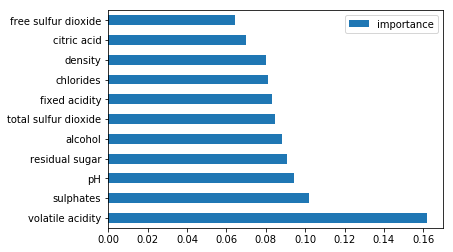

In [16]:
feature_importances.plot(kind='barh')

In [17]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
# under sample "2" ；
# over sample "1", "0"
smt = ClusterCentroids(ratio={2: 500})
X_sm, y_sm = smt.fit_sample(X_train, y_train)
smt2 = SMOTE(ratio={0: 500, 1: 500})
X_sm2, y_sm2 = smt2.fit_sample(X_sm, y_sm)

In [18]:
rfc_rs = RandomForestClassifier(random_state=2018)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rs = GridSearchCV(rfc_rs, param_grid=param_dist,
                         scoring='accuracy', cv=5)
rfc_gs_rs.fit(X_sm2, y_sm2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
importances = rfc_gs_rs.best_estimator_.feature_importances_
redwine.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [20]:
feature_importances = pd.DataFrame(importances,index = redwine
                                   .columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

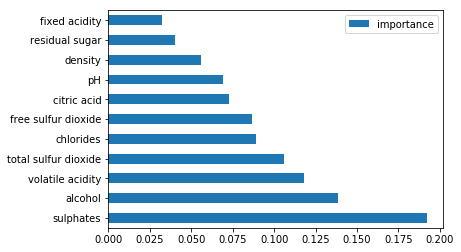

In [21]:
feature_importances.plot(kind='barh')

In [22]:
whitewine = pd.read_csv('winequality-white.csv',delimiter=';')

In [23]:
sum(whitewine.duplicated())



937

In [24]:
whitewine =whitewine.drop_duplicates()
whitewine.shape

(3961, 12)

In [25]:
whitewine = whitewine.reset_index(drop=True)

In [26]:
quality = whitewine["quality"].values
category = []
for num in quality:
    if num < 5:
        category.append("Low Quality")
    elif num > 7:
        category.append("High Quality")
    else:
        category.append("Normal Quality")
len(category)

3961

In [27]:
category = pd.DataFrame(data=category, columns=["category"])
data = pd.concat([whitewine, category], axis=1)

data.drop(columns="quality", axis=1, inplace=True)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [28]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
# Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [31]:
## performing grid search to find the best pararmeters
#Finding best parameters for our SVC model
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
# svc = SVC();

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rfc_rs = RandomForestClassifier(random_state=2018)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rs = GridSearchCV(rfc_rs, param_grid=param_dist,
                         scoring='accuracy', cv=5)
rfc_gs_rs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [34]:
importances = rfc_gs_rs.best_estimator_.feature_importances_
whitewine.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [35]:
feature_importances = pd.DataFrame(importances,index = whitewine
                                   .columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

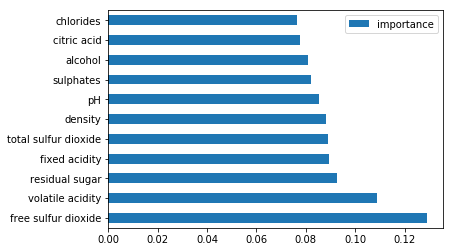

In [36]:
feature_importances.plot(kind='barh')

In [37]:
from imblearn.under_sampling import ClusterCentroids
from imblearn.over_sampling import SMOTE
# under sample "2" ；
# over sample "1", "0"
smt = ClusterCentroids(ratio={2: 1500})
X_sm, y_sm = smt.fit_sample(X_train, y_train)
smt2 = SMOTE(ratio={0: 1500, 1: 1500})
X_sm2, y_sm2 = smt2.fit_sample(X_sm, y_sm)

In [38]:
rfc_rs = RandomForestClassifier(random_state=2018)
param_dist = {"n_estimators": [50, 100, 150, 200, 250],
              'min_samples_leaf': [1, 2, 4]}
rfc_gs_rs = GridSearchCV(rfc_rs, param_grid=param_dist,
                         scoring='accuracy', cv=5)
rfc_gs_rs.fit(X_sm2, y_sm2)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=2018, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [50, 100, 150, 200, 250], 'min_samples_leaf': [1, 2, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [39]:
importances = rfc_gs_rs.best_estimator_.feature_importances_

In [40]:
whitewine.columns[:-1]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [41]:
feature_importances = pd.DataFrame(importances,index = whitewine
                                   .columns[:-1],
                                    columns=['importance']).sort_values('importance',
                                                                            )

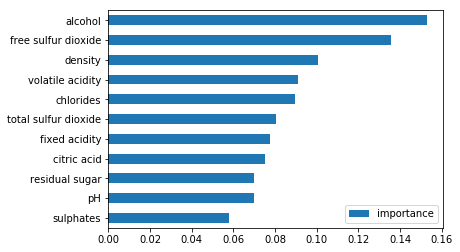

In [42]:
feature_importances.plot(kind='barh')

In [44]:
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier
# load data

dataframe =  pd.read_csv('winequality-white.csv',delimiter=';')
array = dataframe.values
X = array[:,0:11]
Y = array[:,11]
# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.07789601 0.09806505 0.08156367 0.08389287 0.08270887 0.09536277
 0.08447472 0.10247007 0.08240577 0.0829653  0.1281949 ]


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
